In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms

In [5]:

def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [6]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Download and load the test data
testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

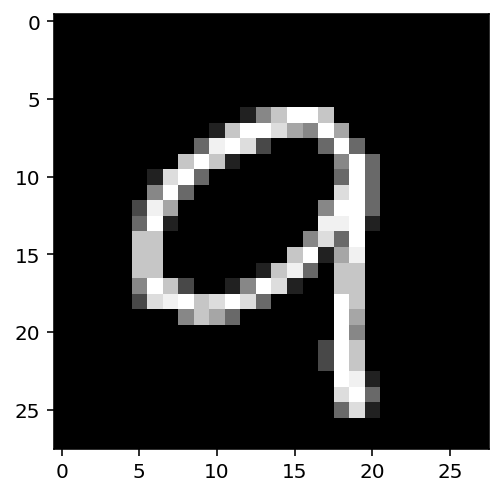

In [8]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [16]:
class Strive_Network(nn.Module):
    
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32,8 )
        self.fc4 = nn.Linear(8, 10)
        
    # Forward pass through the network, returns the output logits
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.softmax(x,dim=1)
        return x

model = Strive_Network()

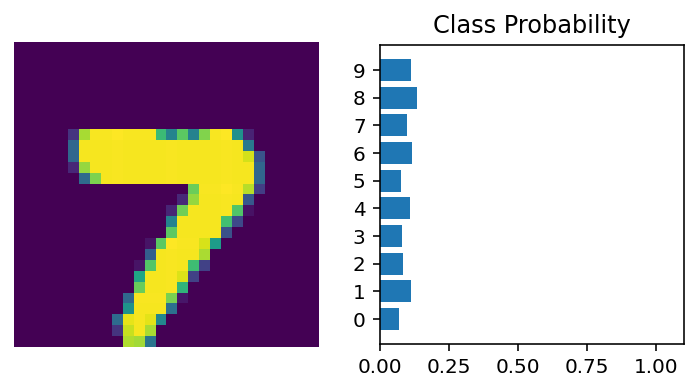

In [17]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [19]:
## TODO: Your training loop here
epochs = 5
print_every = 100

optimizer = optim.SGD(model.parameters(), lr=0.1)
for e in range(epochs):
    running_loss = 0
    total = 0
    correct = 0
    print(f"Epoch: {e+1}/{epochs}")

    model.train()
    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)   # 1) Forward pass
        loss = criterion(output, labels) # 2) Compute loss
        loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0
        

    model.eval()
    with torch.no_grad():
        for i, (images, labels) in enumerate(iter(testloader)):
            images.resize_(images.size()[0], 784)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network: %d %%' % (
        100 * correct / total))

Epoch: 1/5
	Iteration: 0	 Loss: 0.0230
	Iteration: 100	 Loss: 2.3008
	Iteration: 200	 Loss: 2.2981
	Iteration: 300	 Loss: 2.2866
	Iteration: 400	 Loss: 2.2352
	Iteration: 500	 Loss: 2.1434
	Iteration: 600	 Loss: 2.0776
	Iteration: 700	 Loss: 1.9987
	Iteration: 800	 Loss: 1.9765
	Iteration: 900	 Loss: 1.9609
	Iteration: 1000	 Loss: 1.9090
	Iteration: 1100	 Loss: 1.8913
	Iteration: 1200	 Loss: 1.8604
	Iteration: 1300	 Loss: 1.8403
	Iteration: 1400	 Loss: 1.8349
	Iteration: 1500	 Loss: 1.8205
	Iteration: 1600	 Loss: 1.7998
	Iteration: 1700	 Loss: 1.8040
	Iteration: 1800	 Loss: 1.8002
	Iteration: 1900	 Loss: 1.8157
	Iteration: 2000	 Loss: 1.7999
	Iteration: 2100	 Loss: 1.7933
	Iteration: 2200	 Loss: 1.7983
	Iteration: 2300	 Loss: 1.7873
	Iteration: 2400	 Loss: 1.7939
	Iteration: 2500	 Loss: 1.7992
	Iteration: 2600	 Loss: 1.8117
	Iteration: 2700	 Loss: 1.8140
	Iteration: 2800	 Loss: 1.7817
	Iteration: 2900	 Loss: 1.7615
	Iteration: 3000	 Loss: 1.7589
	Iteration: 3100	 Loss: 1.7744
	Iteratio

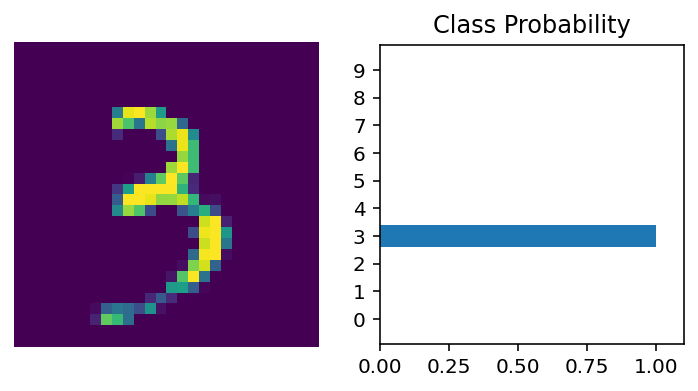

In [20]:
images, labels = next(iter(testloader))
images.resize_(images.shape[0],1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

In [21]:
save_path = "./model.pth"
torch.save(model.state_dict(),save_path)

In [22]:
model = Strive_Network()
model.load_state_dict(torch.load(save_path))
model.eval()

Strive_Network(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=10, bias=True)
)

In [33]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [34]:
from Tensify import Tensify

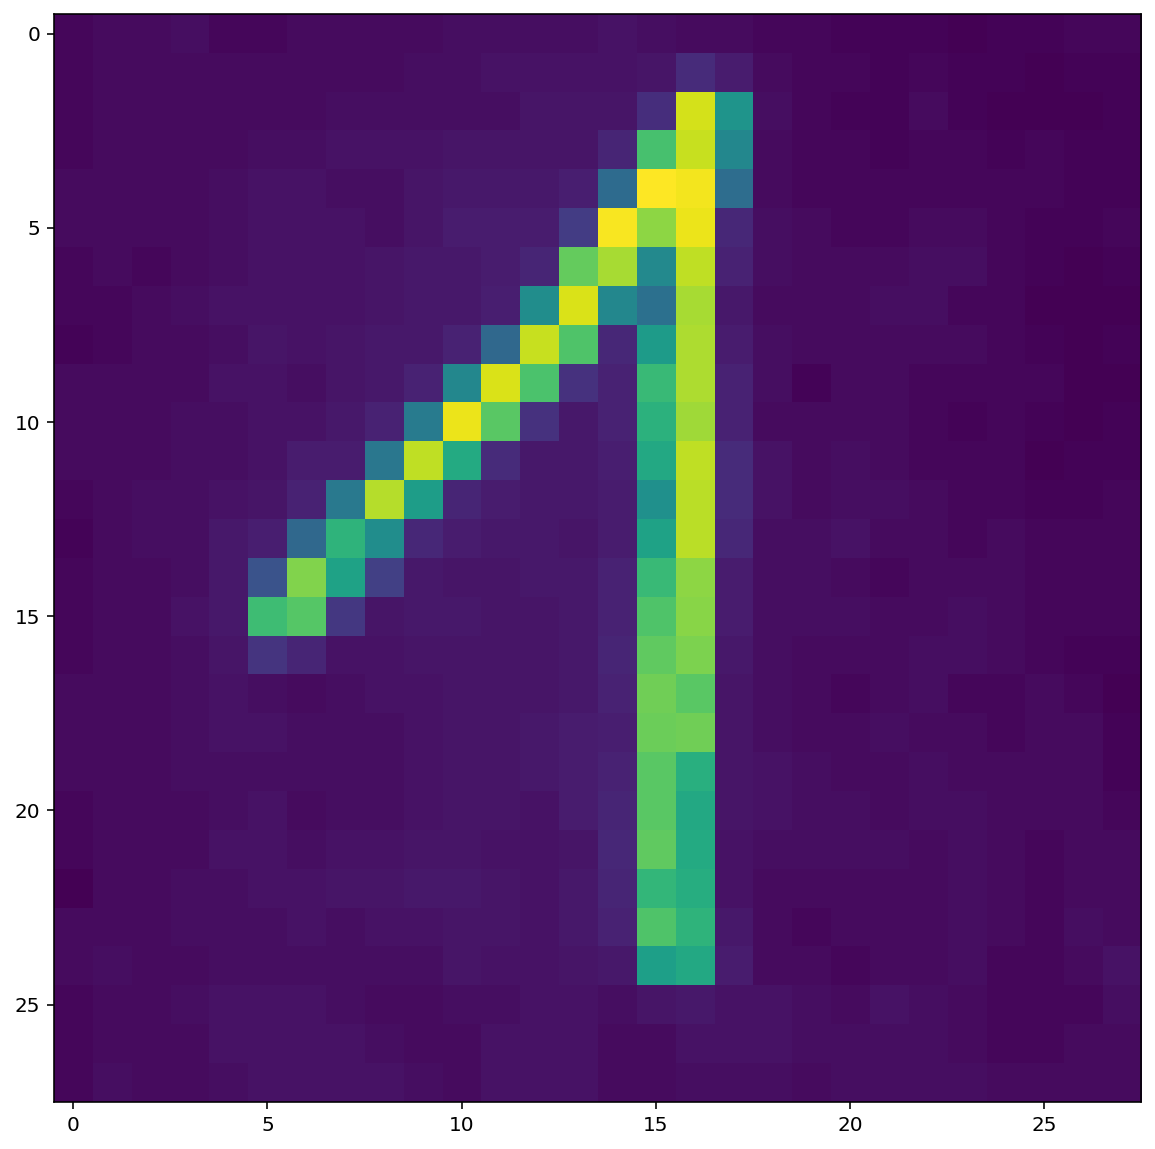

In [35]:
test = Tensify.imagify("./img/","1.jpg")
t = Tensify.tensed(test)

In [36]:
with torch.no_grad():
    ps = model(t)

In [37]:
ps

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

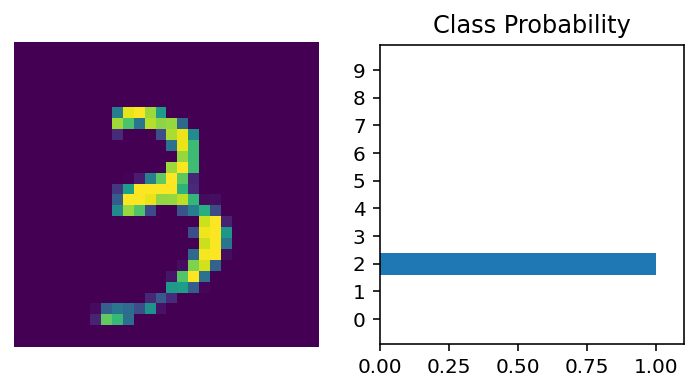

In [38]:
view_classify(images[0].view(1, 28, 28), ps)